START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()


from mpld3 import plugins

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Microcosm

In [2]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height1 = 20  # Mixing layer depth in mm

### Soil - Hydrological Characteristics

In [42]:
13.45*10/60

2.2416666666666667

In [3]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
kSat_crop2 = kSat_crop/100 
# ov_1 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.61  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

# Results

## Hydrology - 1st pulse

##### Observed percolation

In [4]:
# fresh, fresh, aged, aged

# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  

#### Computation

In [5]:
water_data = leachsim(kSat = kSat_crop,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi_crop)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [6]:
water_eval = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop],
    soil_height=soil_height1,
    soil = 'Alteck',
    dtGA = 1,
    AGED = False,
    first_cycle=True
)

FRESH
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.967591161606
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  3.80968602754
55 mm/h - 30min  -4.16283710639
30 mm/h - 30min  -21.305808952
--------------------------------------------
Mass balance:  True True True True


In [7]:
water_eval = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop],
    soil_height=soil_height1,
    soil = 'Alteck',
    dtGA = 1,
    AGED = True,
    first_cycle=True
)

AGED
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.942064837787
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -35.8910849727
55 mm/h - 30min  -8.50907325802
30 mm/h - 30min  -30.5302507367
--------------------------------------------
Mass balance:  True True True True


In [8]:
# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmhA = water_data[:, 20]
time_size_55mmhB = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_135mmh,
               time_size_55mmhA, time_size_55mmhA,
               time_size_55mmhB, time_size_55mmhB,
               time_size_30mmh, time_size_30mmh]


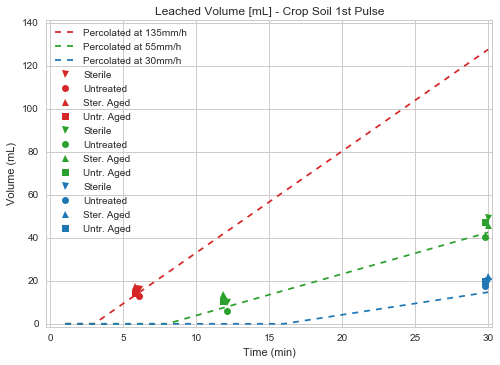

In [9]:
hydroplot(percol_data1, 
          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
          "Leached Volume [mL] - Crop Soil 1st Pulse")

## Transport - 1st pulse

** Initial and observed mass in leachate and ponding **

In [10]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs, initial_mass_error, error_leach, error_pond)
mxCr_dict_S_1st = {
    'a_high_0d': (1818.12, 138.1, 'nan', 755.5, 8, 0.),
    'b_high_1d': (1472.67, 207.1, 'nan', 631.3, 12, 0.),
    'c_med12_0d': (1818.12, 201.0, 'nan', 755.5, 11, 0.),
    'd_med12_1d': (1472.67, 50.4, 'nan', 631.3, 3, 0.),
    'e_med30_0d': (1818.12, 641.8, 'nan', 755.5, 36, 0.),
    'f_med30_1d': (1472.67, 356.8, 'nan', 631.3, 20, 0.),
    'g_low_0d': (1818.12, 177.0, 'nan', 755.5, 10, 0.),
    'h_low_1d': (1472.67, 293.5, 'nan', 631.3, 16, 0.)
}

#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs, initial_mass_error, error_lecah, error_pond)
mxCr_dict_L_1st = {
    'a_high_0d': (1518.06, 145.4, 'nan', 648.3, 8, 0.),
    'b_high_1d': (1413.28, 283.5, 'nan', 597.4, 16, 0.),
    'c_med12_0d': (1518.06, 158.4, 'nan', 648.3, 9, 0.),
    'd_med12_1d': (1413.28, 262.3, 'nan' , 597.4, 15, 0.),
    'e_med30_0d': (1518.06, 674.9, 'nan', 648.3, 38, 0.),
    'f_med30_1d': (1413.28, 360.2, 'nan', 597.4, 20, 0.),
    'g_low_0d': (1518.06, 418.2, 'nan', 648.3, 23, 0.),
    'h_low_1d': (1413.28, 480.9, 'nan', 597.4, 27, 0.)
}

### Soil - Transport Charachteristics

In [11]:
# Soil characteristics

# Initial bulk density options:
# pb_crop_i = 0.1/10**3  # bulk density (g/cm^3) -> g/mm^3  (FAKE TEST)

# pb_crop_i1 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_crop_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_crop_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_crop_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
# pb_crop_f1 = 13.59/10**3 # final1, TEST
pb_crop_f2 = 3.76/10**3 # final2, calculated from experimental conditions.
# pb_crop_f2 = 13.76/10**3 # final2, TEST


porosity_crop = 0.61  # Crop soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 20.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
# foc_crop_untreat2 = 2.04/100
# foc_crop_sterile2 = 0.70*foc_crop_untreat2

### Metalaxyl Properties

In [12]:
# Pesticide Koc 
Koc_mexyl = [163.0, 80, 50, 40.0, 30, 20]  # [(a) , (b), (c)] [ml/g] 
# Koc_mexyl = [30, 25, 20, 20.0, 20, 20]
# Koc_mexyl = [50, 30, 20, 10, 2, 1] 
Koc_mexyl = np.array(Koc_mexyl)*10**3  # [mm3/g]

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_crop_sterile = Koc_mexyl[0]*foc_crop_sterile  
Kd_mexylA_crop_untreat = Koc_mexyl[0]*foc_crop_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_crop_sterile = Koc_mexyl[1]*foc_crop_sterile  
Kd_mexylB_crop_untreat = Koc_mexyl[1]*foc_crop_untreat

# Kd (c) - https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_crop_sterile = Koc_mexyl[2]*foc_crop_sterile  
Kd_mexylC_crop_untreat = Koc_mexyl[2]*foc_crop_untreat

Kd_mexylD_crop_sterile = Koc_mexyl[3]*foc_crop_sterile  
Kd_mexylD_crop_untreat = Koc_mexyl[3]*foc_crop_untreat

Kd_mexylE_crop_sterile = Koc_mexyl[4]*foc_crop_sterile  
Kd_mexylE_crop_untreat = Koc_mexyl[4]*foc_crop_untreat

Kd_mexylF_crop_sterile = Koc_mexyl[5]*foc_crop_sterile  
Kd_mexylF_crop_untreat = Koc_mexyl[5]*foc_crop_untreat

Kd_mexyl_sterile = [Kd_mexylA_crop_sterile, 
                    Kd_mexylB_crop_sterile, 
                    Kd_mexylC_crop_sterile,
                    Kd_mexylD_crop_sterile,
                    Kd_mexylE_crop_sterile,
                    Kd_mexylF_crop_sterile]

Kd_mexyl_living = [Kd_mexylA_crop_untreat, 
                   Kd_mexylB_crop_untreat,
                   Kd_mexylC_crop_untreat,
                   Kd_mexylD_crop_untreat,
                   Kd_mexylE_crop_untreat,
                   Kd_mexylF_crop_untreat]

In [13]:
# kdmx_array = np.asarray(Kd_mexyl_sterile)
# np.log10(kdmx_array)

### Computation transport - 1st pulse

In [14]:
# Any length unit input must be: "mm"
pest_sterile_1st = pest_test3(
    Kd_mexyl_sterile,
    mxCr_dict_S_1st,          
    pb_crop_i1, pb_crop_f1,
    ovSat_crop,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True,
    living = False)

1st Pulse
Sterile
--------------------------------------------
Koc tested:  [ 163.   80.   50.   40.   30.   20.]
Best log Kd:  0.2542289455737923 cm3/g ( Num:  2 ) 
 R2:  0.478316530318
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -71.4379988073 | 39.4441236471 | 138.1
(A) 135 mm/h - Aged  -84.5728711009 | 31.9495839501 | 207.1
(B) 55 mm/h - Fresh  -86.2563707739 | 27.6246947444 | 201.0
(B) 55 mm/h - Aged  -55.6033862194 | 22.3758933454 | 50.4
(C) 55 mm/h - Fresh  -16.562241458 | 535.503534323 | 641.8
(C) 55 mm/h - Aged  21.5683133787 | 433.755742135 | 356.8
(D) 30 mm/h - Fresh  -15.6907244221 | 1151.35199783 | 177.0
(D) 30 mm/h - Aged  -58.8164846898 | 932.590558731 | 293.5


In [15]:
# Any length unit input must be: "mm"
pest_living_1st = pest_test3(
    Kd_mexyl_living,
    mxCr_dict_L_1st,          
    pb_crop_i1, pb_crop_f1,
    ovSat_crop,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True,
    living = True)

1st Pulse
Living
--------------------------------------------
Koc tested:  [ 163.   80.   50.   40.   30.   20.]
Best log Kd:  0.10663958374268462 cm3/g ( Num:  4 ) 
 R2:  -0.489794500691
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -59.2971490431 | 59.1819452913 | 145.4
(A) 135 mm/h - Aged  -80.5654070456 | 55.0970710258 | 283.5
(B) 55 mm/h - Fresh  -73.5686546261 | 41.8672510723 | 158.4
(B) 55 mm/h - Aged  -85.1401155515 | 38.9774769083 | 262.3
(C) 55 mm/h - Fresh  3.58705758769 | 699.109051659 | 674.9
(C) 55 mm/h - Aged  80.6926523094 | 650.854933619 | 360.2
(D) 30 mm/h - Fresh  -47.734344882 | 1229.48136542 | 418.2
(D) 30 mm/h - Aged  -57.6859177529 | 1144.61972789 | 480.9


#### Sterile time series

In [16]:
# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_1st[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_1st[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_1st[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_1st[:, 9]
high_1d_overmass_dt = pest_sterile_1st[:, 10]
med12_0d_overmass_dt = pest_sterile_1st[:, 11]
med12_1d_overmass_dt = pest_sterile_1st[:, 12]

med30_0d_overmass_dt = pest_sterile_1st[:, 13]
med30_1d_overmass_dt = pest_sterile_1st[:, 14]
low_0d_overmass_dt = pest_sterile_1st[:, 15]
low_1d_overmass_dt = pest_sterile_1st[:, 16]


mass_percol_sterile1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

#### Living time series

In [17]:
# Cumulative leachate
high_0d_cum_mass_out_dt = pest_living_1st[:, 1]
high_1d_cum_mass_out_dt = pest_living_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_living_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_living_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_living_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_living_1st[:, 6]

low_0d_cum_mass_out_dt = pest_living_1st[:, 7]
low_1d_cum_mass_out_dt = pest_living_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_1st[:, 9]
high_1d_overmass_dt = pest_living_1st[:, 10]
med12_0d_overmass_dt = pest_living_1st[:, 11]
med12_1d_overmass_dt = pest_living_1st[:, 12]

med30_0d_overmass_dt = pest_living_1st[:, 13]
med30_1d_overmass_dt = pest_living_1st[:, 14]
low_0d_overmass_dt = pest_living_1st[:, 15]
low_1d_overmass_dt = pest_living_1st[:, 16]


mass_percol_living1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - Metalaxyl

### Sterile (1st Pulse, Crop Soil)

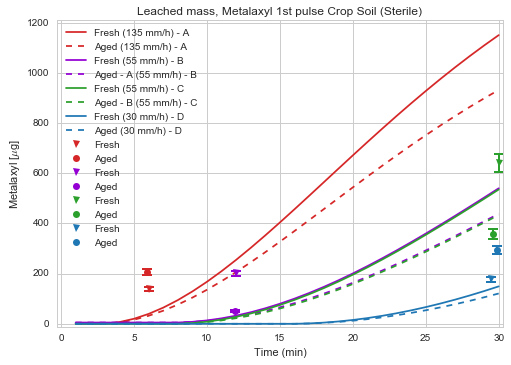

In [18]:
pestiplot_condition(
    mass_percol_sterile1,
    mxCr_dict_S_1st,
    'Metalaxyl',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

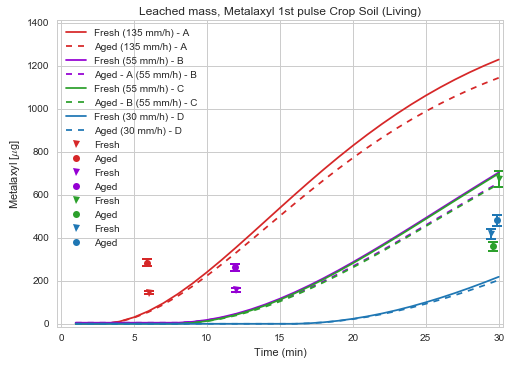

In [19]:
pestiplot_condition(
    mass_percol_living1,
    mxCr_dict_L_1st,
    'Metalaxyl',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

In [20]:
''' Hydrological controlling parameters'''
ov_2 = ovSat_crop - 0.038  # Initial water content m3. m-3
psi_crop = 1100  # soil suction Alteck mm
psi_cropB = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height2 = 20  # mm

**Observed Percolation - 2nd pulse**

In [21]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

**Observed Ponding - 2nd pulse**

In [22]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [23]:
water2_ktest_fresh = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/25, kSat_crop/50, kSat_crop/100, 
            kSat_crop/125, kSat_crop/150, kSat_crop/175, 
            kSat_crop/200, kSat_crop/250],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = False
)

FRESH
--------------------------------------------
ksat high:  0.26880000000000004 cm/h
ksat med12:  0.5376000000000001 cm/h
ksat med30:  0.05376 cm/h
ksat low:  0.26880000000000004 cm/h
--------------------------------------------
R2:  0.731113260331
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.31697973948
55 mm/h - 12min  2.1485605593
55 mm/h - 30min  112.550174466
30 mm/h - 30min  51.4046884511
--------------------------------------------
Mass balance:  True True True True


In [24]:
water2_ktest_aged = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/50, kSat_crop/100, kSat_crop/125, 
            kSat_crop/150, kSat_crop/175, kSat_crop/200, 
            kSat_crop/250, kSat_crop/700, kSat_crop/1000],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = True
)

AGED
--------------------------------------------
ksat high:  0.05376 cm/h
ksat med12:  0.06720000000000001 cm/h
ksat med30:  0.06720000000000001 cm/h
ksat low:  0.01344 cm/h
--------------------------------------------
R2:  0.800359441604
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  36.6548875886
55 mm/h - 12min  367.391227272
55 mm/h - 30min  94.9388863921
30 mm/h - 30min  389.024260708
--------------------------------------------
Mass balance:  True True True True


#### Time series fresh

In [25]:
# Time axis
cum_time_30min = water2_ktest_fresh[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_fresh[:, 9]
cum_leach_55mmhA = water2_ktest_fresh[:, 10]
cum_leach_55mmhB = water2_ktest_fresh[:, 11]
cum_leach_30mmh = water2_ktest_fresh[:, 12]

# Group each compartment for graphing
percol_data2_fresh = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding fresh
roff_135mmh = water2_ktest_fresh[:, 13]
roff_55mmhA = water2_ktest_fresh[:, 14]
roff_55mmhB = water2_ktest_fresh[:, 15]
roff_30mmh = water2_ktest_fresh[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_fresh[:, 17]
cum_roff_55mmhA = water2_ktest_fresh[:, 18]
cum_roff_55mmhB = water2_ktest_fresh[:, 19]
cum_roff_30mmh = water2_ktest_fresh[:, 20]


runoff_data2_fresh = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)


time_size_135mmh = water2_ktest_fresh[:, 25]
time_size_55mmhA = water2_ktest_fresh[:, 26]
time_size_55mmhB = water2_ktest_fresh[:, 27]
time_size_30mmh = water2_ktest_fresh[:, 28]

time_sizes2 = [time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhB, 
               time_size_30mmh]

#### Time series aged

In [26]:
# Time axis
cum_time_30min = water2_ktest_aged[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_aged[:, 9]
cum_leach_55mmhA = water2_ktest_aged[:, 10]
cum_leach_55mmhB = water2_ktest_aged[:, 11]
cum_leach_30mmh = water2_ktest_aged[:, 12]

# Group each compartment for graphing
percol_data2_aged = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding Aged
roff_135mmh = water2_ktest_aged[:, 13]
roff_55mmhA = water2_ktest_aged[:, 14]
roff_55mmhB = water2_ktest_aged[:, 15]
roff_30mmh = water2_ktest_aged[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_aged[:, 17]
cum_roff_55mmhA = water2_ktest_aged[:, 18]
cum_roff_55mmhB = water2_ktest_aged[:, 19]
cum_roff_30mmh = water2_ktest_aged[:, 20]


runoff_data2_aged = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)


time_size_135mmh = water2_ktest_aged[:, 25]
time_size_55mmhA = water2_ktest_aged[:, 26]
time_size_55mmhB = water2_ktest_aged[:, 27]
time_size_30mmh = water2_ktest_aged[:, 28]

time_sizes2 = [time_size_135mmh, time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhA, 
               time_size_55mmhB, time_size_55mmhB, 
               time_size_30mmh, time_size_30mmh]

### Percolation & ponding - 2nd pulse (fresh soil)

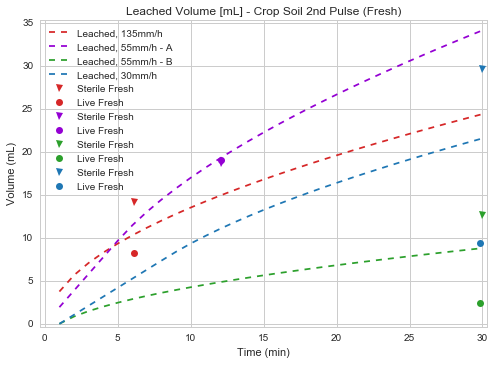

In [27]:
hydroplot2(percol_data2_fresh, 
          "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Crop Soil 2nd Pulse",
          AGED = False)

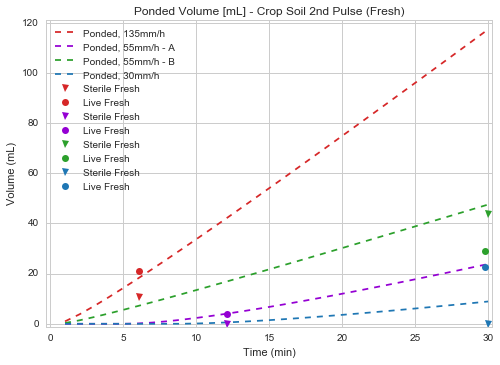

In [28]:
hydroplot2(runoff_data2_fresh, 
          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
          AGED = False)

### Percolation & ponding - 2nd pulse (aged soil)

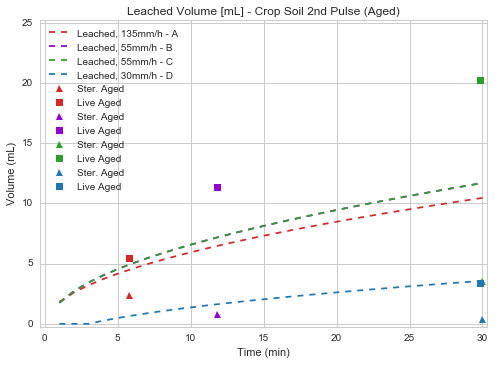

In [29]:
hydroplot2(percol_data2_aged, 
          "Leached, 135mm/h - A", 
           "Leached, 55mm/h - B", "Leached, 55mm/h - C", 
           "Leached, 30mm/h - D",
          leach_high_6min, 
           leach_med_12min, leach_med_30min, 
           leach_low_30min,
         "Leached Volume [mL] - Crop Soil 2nd Pulse",
          AGED = True)

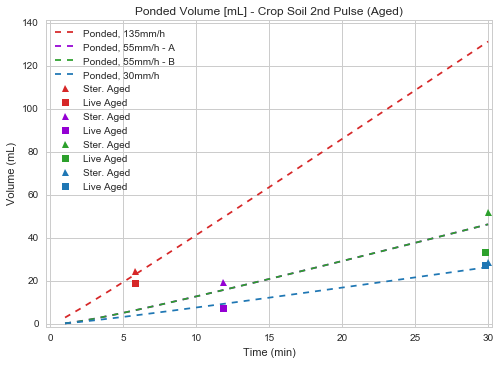

In [30]:
hydroplot2(runoff_data2_aged, 
          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
          AGED = True)

## Transport - 2nd pulse

** Initial and observed mass in leachate and ponding **

In [31]:
#  Dictionary contains:

#  Scenario: 
# (initial_mass, leached_mass_observed, ponded_mass_obs, 
#  initial_mass_error, error_leach, error_pond)
mxCr_dict_S_2nd = {
    'a_high_0d': (1496.75, 8.35, 5.7, 763.2, 0.5, 0.3),
    'b_high_1d': (1127.52, 37.57, 4.1, 642.9, 2.0, 0.2),
    'c_med12_0d': (1440.72, 290.3, 'nan', 766.8, 'nan', 'nan'),
    'd_med12_1d': (1267.11, 'nan', 9.2, 634.1, 'nan', 0.5),
    'e_med30_0d': (1047.95, 93.3, 4.3, 791.4, 5.2, 0.2),
    'f_med30_1d': (994.09, 82.2, 14.0, 651.3, 4.6, 0.8),
    'g_low_0d': (1462.08, 285.3, 'nan', 765.4, 'nan', 'nan'),
    'h_low_1d': (1050.48, 'nan', 12.4, 647.7, 'nan', 0.7)
}

mxCr_dict_L_2nd = {
    'a_high_0d': (1222.86, 175.44, 4.7, 656.4, 9.8, 0.3),
    'b_high_1d': (1006.54, 40.03, 3.2, 613.3, 1.7, 0.2),
    'c_med12_0d': (1211.28, 272.5, 1.8, 657.1, 15.2, 0.1),
    'd_med12_1d': (1025.43, 168.5, 'nan', 612.1, 9.4, 'nan'),
    'e_med30_0d': (751.13, 35.1, 8.9, 686.0, 2.1, 0.5),
    'f_med30_1d': (938.23, 146.1, 0.1, 617.5, 8.2, 0.008),
    'g_low_0d': (979.82, 86.0, 5.8, 671.7, 4.8, 0.3),
    'h_low_1d': (830.68, 76.5, 9.6, 624.3, 4.3, 0.5)
}

In [32]:
mxCr_dict_S_2nd['a_high_0d'][1]

8.35

#### Change in organic matter characterisitics

In [33]:
# Fraction organic matter and carbon 
fom_crop_sterile = 3.85/100.0
fom_crop_untreat = 5.50/100.0

foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Pesticide Koc 
# Koc_mexyl = [200, 182.0, 163.0, 100, 80.0, 50, 30]  # [ml/g] 
# Koc_mexyl = [50, 30, 20, 10, 2] 
# Koc_mexyl = np.array(Koc_mexyl)*10**3  # [mm3/g]

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_crop_sterile = Koc_mexyl[0]*foc_crop_sterile  
Kd_mexylA_crop_untreat = Koc_mexyl[0]*foc_crop_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_crop_sterile = Koc_mexyl[1]*foc_crop_sterile  
Kd_mexylB_crop_untreat = Koc_mexyl[1]*foc_crop_untreat

# Kd (c)
# https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_crop_sterile = Koc_mexyl[2]*foc_crop_sterile  
Kd_mexylC_crop_untreat = Koc_mexyl[2]*foc_crop_untreat

Kd_mexylD_crop_sterile = Koc_mexyl[3]*foc_crop_sterile  
Kd_mexylD_crop_untreat = Koc_mexyl[3]*foc_crop_untreat

Kd_mexylE_crop_sterile = Koc_mexyl[4]*foc_crop_sterile  
Kd_mexylE_crop_untreat = Koc_mexyl[4]*foc_crop_untreat

Kd_mexylF_crop_sterile = Koc_mexyl[5]*foc_crop_sterile  
Kd_mexylF_crop_untreat = Koc_mexyl[5]*foc_crop_untreat

Kd_mexyl_sterile2 = [Kd_mexylA_crop_sterile, 
                    Kd_mexylB_crop_sterile, 
                    Kd_mexylC_crop_sterile,
                    Kd_mexylD_crop_sterile,
                    Kd_mexylE_crop_sterile,
                    Kd_mexylF_crop_sterile]

Kd_mexyl_living2 = [Kd_mexylA_crop_untreat, 
                   Kd_mexylB_crop_untreat,
                   Kd_mexylC_crop_untreat,
                   Kd_mexylD_crop_untreat,
                   Kd_mexylE_crop_untreat,
                   Kd_mexylF_crop_untreat]

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [34]:

mx_sterile_2nd = pest_test3(
    Kd_mexyl_sterile2,
    mxCr_dict_S_2nd,
    pb_crop_i2, pb_crop_f2,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    first_cycle = False,
    living = False)


2nd Pulse
Sterile
--------------------------------------------
Koc tested:  [ 162.15762274   79.58656331   49.74160207   39.79328165   29.84496124
   19.89664083]
Best log Kd:  0.5610763274753958 cm3/g ( Num:  1 ) 
 R2:  0.0957060002361
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  67.9928776898 | 14.0274052871 | 8.35
(A) 135 mm/h - Aged  -67.0480339499 | 12.380053645 | 37.57
(B) 55 mm/h - Fresh  -86.4610234426 | 39.3036489462 | 290.3
(B) 55 mm/h - Aged  No obs | < LD  | 3.30046657507 | nan
(C) 55 mm/h - Fresh  -63.7722440996 | 33.8004962551 | 93.3
(C) 55 mm/h - Aged  49.2827512586 | 64.503196323 | 82.2
(D) 30 mm/h - Fresh  -63.1514068285 | 138.814315788 | 285.3
(D) 30 mm/h - Aged  No obs | < LD  | 287.791085989 | nan


#### Kd optimal (living)

In [35]:

mx_living_2nd = pest_test3(
    Kd_mexyl_living2,
    mxCr_dict_L_2nd,
    pb_crop_i2, pb_crop_f2,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    first_cycle = False,
    living = True)


2nd Pulse
Living
--------------------------------------------
Koc tested:  [ 162.70417423   79.85480944   49.9092559    39.92740472   29.94555354
   19.96370236]
Best log Kd:  0.4068806700491247 cm3/g ( Num:  2 ) 
 R2:  -1.25110908395
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -87.8432225611 | 21.3278503388 | 175.44
(A) 135 mm/h - Aged  -46.741212139 | 21.3194927807 | 40.03
(B) 55 mm/h - Fresh  -76.8241080438 | 63.1543055807 | 272.5
(B) 55 mm/h - Aged  -96.9051938612 | 5.21474834388 | 168.5
(C) 55 mm/h - Fresh  32.2539713388 | 46.4211439399 | 35.1
(C) 55 mm/h - Aged  42.4132146444 | 98.3073225279 | 146.1
(D) 30 mm/h - Fresh  52.8513872711 | 207.025916609 | 86.0
(D) 30 mm/h - Aged  -65.4645905916 | 420.30898625 | 76.5


#### Sterile time series

In [36]:
# Time axis
cum_time_30min = mx_sterile_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = mx_sterile_2nd[:, 1]
high_1d_cum_mass_out_dt = mx_sterile_2nd[:, 2]

med12_0d_cum_mass_out_dt = mx_sterile_2nd[:, 3]
med12_1d_cum_mass_out_dt = mx_sterile_2nd[:, 4]

med30_0d_cum_mass_out_dt = mx_sterile_2nd[:, 5]
med30_1d_cum_mass_out_dt = mx_sterile_2nd[:, 6]

low_0d_cum_mass_out_dt = mx_sterile_2nd[:, 7]
low_1d_cum_mass_out_dt = mx_sterile_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = mx_sterile_2nd[:, 9]
high_1d_overmass_dt = mx_sterile_2nd[:, 10]
med12_0d_overmass_dt = mx_sterile_2nd[:, 11]
med12_1d_overmass_dt = mx_sterile_2nd[:, 12]

med30_0d_overmass_dt = mx_sterile_2nd[:, 13]
med30_1d_overmass_dt = mx_sterile_2nd[:, 14]
low_0d_overmass_dt = mx_sterile_2nd[:, 15]
low_1d_overmass_dt = mx_sterile_2nd[:, 16]

mass_percol_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)

#### Living time series

In [37]:

# Time axis
cum_time_30min = mx_living_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = mx_living_2nd[:, 1]
high_1d_cum_mass_out_dt = mx_living_2nd[:, 2]

med12_0d_cum_mass_out_dt = mx_living_2nd[:, 3]
med12_1d_cum_mass_out_dt = mx_living_2nd[:, 4]

med30_0d_cum_mass_out_dt = mx_living_2nd[:, 5]
med30_1d_cum_mass_out_dt = mx_living_2nd[:, 6]

low_0d_cum_mass_out_dt = mx_living_2nd[:, 7]
low_1d_cum_mass_out_dt = mx_living_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = mx_living_2nd[:, 9]
high_1d_overmass_dt = mx_living_2nd[:, 10]
med12_0d_overmass_dt = mx_living_2nd[:, 11]
med12_1d_overmass_dt = mx_living_2nd[:, 12]

med30_0d_overmass_dt = mx_living_2nd[:, 13]
med30_1d_overmass_dt = mx_living_2nd[:, 14]
low_0d_overmass_dt = mx_living_2nd[:, 15]
low_1d_overmass_dt = mx_living_2nd[:, 16]

mass_percol_living2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - Metalaxyl

### Sterile (2nd Pulse, Crop Soil)

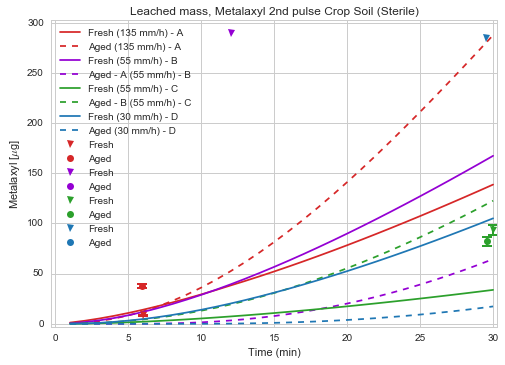

In [38]:
pestiplot_condition(
    mass_percol_sterile2,
    mxCr_dict_S_2nd,
    'Metalaxyl',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

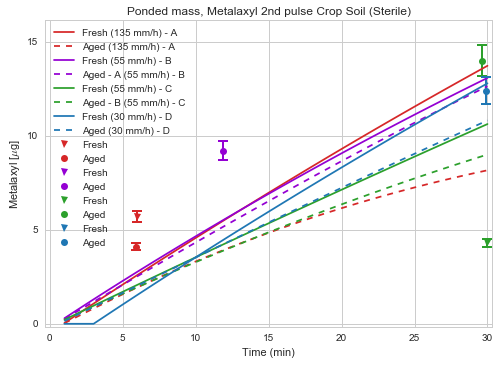

In [39]:
pestiplot_condition(
    mass_pond_sterile2,
    mxCr_dict_S_2nd,
    'Metalaxyl',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse, Crop Soil)

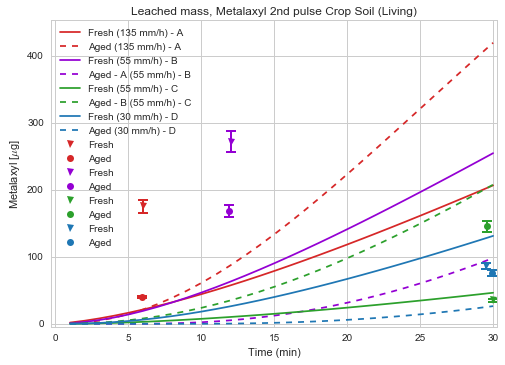

In [40]:
pestiplot_condition(
    mass_percol_living2,
    mxCr_dict_L_2nd,
    'Metalaxyl',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

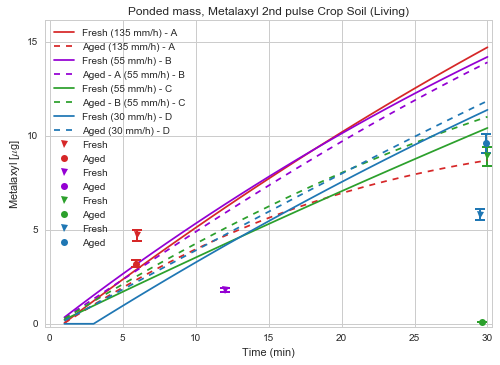

In [41]:
pestiplot_condition(
    mass_pond_living2,
    mxCr_dict_L_2nd,
    'Metalaxyl',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK